In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import requests, zipfile, io
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geodatasets import get_path
from shapely.geometry import Point

In [64]:
API_BASE_URL = "https://hub.worldpop.org/rest/data/pop/wpic1km?iso3="

In [65]:
country_API = API_BASE_URL+"USA"

In [66]:
response = requests.get(country_API)

In [67]:
response.json()['data'][-2]['files']

['https://data.worldpop.org/GIS/Population/Global_2000_2020_1km/2019/USA/usa_ppp_2019_1km_Aggregated.tif',
 'https://data.worldpop.org/GIS/Population/Global_2000_2020_1km/2019/USA/usa_ppp_2019_1km_ASCII_XYZ.zip',
 'https://data.worldpop.org/GIS/Population/Global_2000_2020_1km/2019/USA/50_US_states_1km_2019.zip']

In [68]:
data_list = response.json()['data'][0]['files']

In [69]:
data_list

['https://data.worldpop.org/GIS/Population/Global_2000_2020_1km/2000/USA/usa_ppp_2000_1km_Aggregated.tif',
 'https://data.worldpop.org/GIS/Population/Global_2000_2020_1km/2000/USA/usa_ppp_2000_1km_ASCII_XYZ.zip',
 'https://data.worldpop.org/GIS/Population/Global_2000_2020_1km/2000/USA/50_US_states_1km_2000.zip']

In [70]:
file_to_dl = [file for file in data_list if file.endswith("XYZ.zip")]

In [71]:
file_to_dl

['https://data.worldpop.org/GIS/Population/Global_2000_2020_1km/2000/USA/usa_ppp_2000_1km_ASCII_XYZ.zip']

In [72]:
file_to_dl[0]

'https://data.worldpop.org/GIS/Population/Global_2000_2020_1km/2000/USA/usa_ppp_2000_1km_ASCII_XYZ.zip'

In [73]:
# zip_URL = file_to_dl[0]

In [74]:
# zip_file = requests.get(zip_URL)

In [75]:
# zip_file.content

In [76]:
# zipfile.ZipFile(io.BytesIO(zip_file.content))

In [77]:
# z = zipfile.ZipFile(io.BytesIO(zip_file.content))

In [78]:
# with open("temp.zip", "w") as file:
#         file.write(z)
#         # pd.read_csv("temp.zip", compression='zip')

In [79]:
# zip_show = zip_content.extractall("/Users/yuji/code/illuminating_horizons/illuminating_horizons/data_exploration/CSV_data")

In [80]:
local_path = '/Users/yuji/code/illuminating_horizons/illuminating_horizons/data_exploration/ppp_USA_2019_1km_Aggregated.csv'

In [81]:
pop_df = pd.read_csv(local_path)
pop_df.head()

,X,Y,Z
0,-156.488749,71.387083,0.0
1,-156.480416,71.387083,0.0
2,-156.472083,71.387083,0.0
3,-156.463749,71.387083,0.0
4,-156.455416,71.387083,0.0


In [82]:
pop_df['id'] = range(1, len(pop_df)+1)

In [83]:
pop_df.shape

(15849306, 4)

In [84]:
pop_long = pop_df['X'].tolist()

In [85]:
pop_lat = pop_df['Y'].tolist()

In [86]:
pop_id = pop_df['id'].tolist()

In [87]:
gdf = gpd.GeoDataFrame(
    pop_df, geometry=gpd.points_from_xy(pop_df.X, pop_df.Y, crs="EPSG:4326")
)

In [88]:
gdf.head()

,X,Y,Z,id,geometry
0,-156.488749,71.387083,0.0,1,POINT (-156.48875 71.38708)
1,-156.480416,71.387083,0.0,2,POINT (-156.48042 71.38708)
2,-156.472083,71.387083,0.0,3,POINT (-156.47208 71.38708)
3,-156.463749,71.387083,0.0,4,POINT (-156.46375 71.38708)
4,-156.455416,71.387083,0.0,5,POINT (-156.45542 71.38708)


In [89]:
sample = gdf['geometry'][110:120]
sample

110    POINT (-156.09708 71.32875)
111    POINT (-156.08875 71.32875)
112    POINT (-156.08042 71.32875)
113    POINT (-156.07208 71.32875)
114    POINT (-156.06375 71.32875)
115    POINT (-156.72208 71.32042)
116    POINT (-156.71375 71.32042)
117    POINT (-156.70542 71.32042)
118    POINT (-156.69708 71.32042)
119    POINT (-156.68875 71.32042)
Name: geometry, dtype: geometry

In [90]:
pop_geometry = gdf['geometry'].tolist()

In [91]:
pop_geometry

[<POINT (-156.489 71.387)>,
 <POINT (-156.48 71.387)>,
 <POINT (-156.472 71.387)>,
 <POINT (-156.464 71.387)>,
 <POINT (-156.455 71.387)>,
 <POINT (-156.447 71.387)>,
 <POINT (-156.439 71.387)>,
 <POINT (-156.489 71.379)>,
 <POINT (-156.48 71.379)>,
 <POINT (-156.472 71.379)>,
 <POINT (-156.464 71.379)>,
 <POINT (-156.455 71.379)>,
 <POINT (-156.439 71.379)>,
 <POINT (-156.43 71.379)>,
 <POINT (-156.422 71.379)>,
 <POINT (-156.414 71.379)>,
 <POINT (-156.505 71.37)>,
 <POINT (-156.497 71.37)>,
 <POINT (-156.489 71.37)>,
 <POINT (-156.48 71.37)>,
 <POINT (-156.422 71.37)>,
 <POINT (-156.414 71.37)>,
 <POINT (-156.405 71.37)>,
 <POINT (-156.397 71.37)>,
 <POINT (-156.389 71.37)>,
 <POINT (-156.539 71.362)>,
 <POINT (-156.53 71.362)>,
 <POINT (-156.522 71.362)>,
 <POINT (-156.514 71.362)>,
 <POINT (-156.505 71.362)>,
 <POINT (-156.497 71.362)>,
 <POINT (-156.389 71.362)>,
 <POINT (-156.38 71.362)>,
 <POINT (-156.372 71.362)>,
 <POINT (-156.364 71.362)>,
 <POINT (-156.314 71.362)>,
 <POINT

from shapely.geometry import Point
df = geopandas.tools.reverse_geocode(  
    [Point(-71.0594869, 42.3584697), Point(-77.0365305, 38.8977332)]
)
df  
                     geometry                                            address
0  POINT (-71.05941 42.35837)       29 Court Sq, Boston, MA 02108, United States
1  POINT (-77.03641 38.89766)  1600 Pennsylvania Ave NW, Washington, DC 20006...

In [92]:
df = gpd.tools.reverse_geocode(sample)
df

,geometry,address
110,POINT EMPTY,None
111,POINT EMPTY,None
112,POINT EMPTY,None
113,POINT EMPTY,None
114,POINT EMPTY,None
115,POINT (-156.72354 71.31456),"Stevenson Street, 99273, Utqiaġvik, Alaska, Un..."
116,POINT (-156.70079 71.32163),"Stevenson Street, 99273, Utqiaġvik, Alaska, Un..."
117,POINT (-156.70079 71.32163),"Stevenson Street, 99273, Utqiaġvik, Alaska, Un..."
118,POINT (-156.70079 71.32163),"Stevenson Street, 99273, Utqiaġvik, Alaska, Un..."
119,POINT (-156.69778 71.32256),"Stevenson Street, 99273, Utqiaġvik, Alaska, Un..."


In [93]:
from geodata_processing import download_gdf

In [94]:
usa_gdf = download_gdf('USA',1)

In [95]:
california_gdf = usa_gdf[usa_gdf['NAME_1'] == "California"]

In [96]:
california_gdf

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA,"MULTIPOLYGON (((-117.23300 32.77420, -117.2336..."


In [97]:
california_pop = gdf.sjoin(california_gdf, how='inner')

In [98]:
california_pop

,X,Y,Z,id,geometry,index_right,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1
8193206,-123.205416,42.003750,0.000000,8193207,POINT (-123.20542 42.00375),4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA
8193207,-123.197083,42.003750,0.000000,8193208,POINT (-123.19708 42.00375),4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA
8193208,-123.188749,42.003750,0.000000,8193209,POINT (-123.18875 42.00375),4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA
8193209,-123.180416,42.003750,0.000000,8193210,POINT (-123.18042 42.00375),4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA
8193210,-123.172083,42.003750,0.000000,8193211,POINT (-123.17208 42.00375),4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14442148,-117.097083,32.545417,0.044895,14442149,POINT (-117.09708 32.54542),4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA
14442149,-117.088750,32.545417,20.881916,14442150,POINT (-117.08875 32.54542),4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA
14442150,-117.080416,32.545417,7.611944,14442151,POINT (-117.08042 32.54542),4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA
14442151,-117.072083,32.545417,0.446232,14442152,POINT (-117.07208 32.54542),4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA


In [99]:
gdf.shape[0]

15849306

In [100]:
california_pop.shape[0]

595741

In [101]:
gdf.shape[0] / california_pop.shape[0]

26.604356591203224

<Axes: >

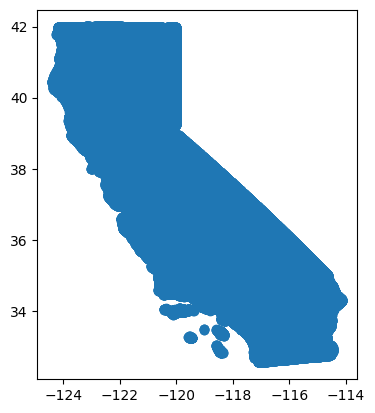

In [102]:
california_pop.plot()

In [103]:
type(california_pop)

geopandas.geodataframe.GeoDataFrame

In [104]:
california_pop.to_file('california_pop.shp')

/var/folders/nd/s9p7nt716tl4t0v1q754xm6h0000gn/T/ipykernel_70713/3026898785.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  california_pop.to_file('california_pop.shp')


In [105]:
# try:
#     df = gpd.tools.reverse_geocode(gdf['geometry'])
# except エラーの種類:
#     continue

In [106]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load California boundaries
california_shapefile = '/Users/yuji/code/illuminating_horizons/illuminating_horizons/data_exploration/tl_2023_us_state.dbf'
california = gpd.read_file(california_shapefile)
california

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,0400000US54,WV,West Virginia,00,G4000,A,62266499712,489003081,+38.6472854,-080.6183274,None
1,3,5,12,00294478,12,0400000US12,FL,Florida,00,G4000,A,138963763779,45970528648,+28.3989775,-082.5143005,None
2,2,3,17,01779784,17,0400000US17,IL,Illinois,00,G4000,A,143778366814,6216688589,+40.1028754,-089.1526108,None
3,2,4,27,00662849,27,0400000US27,MN,Minnesota,00,G4000,A,206244555303,18937471947,+46.3159573,-094.1996043,None
4,3,5,24,01714934,24,0400000US24,MD,Maryland,00,G4000,A,25151736098,6979330958,+38.9466584,-076.6744939,None
5,1,1,44,01219835,44,0400000US44,RI,Rhode Island,00,G4000,A,2677763372,1323686976,+41.5964850,-071.5264901,None
6,4,8,16,01779783,16,0400000US16,ID,Idaho,00,G4000,A,214049886849,2391614331,+44.3484222,-114.5588538,None
7,1,1,33,01779794,33,0400000US33,NH,New Hampshire,00,G4000,A,23190126365,1025956733,+43.6727945,-071.5841886,None
8,3,5,37,01027616,37,0400000US37,NC,North Carolina,00,G4000,A,125935880061,13453540851,+35.5397100,-079.1308636,None
9,1,1,50,01779802,50,0400000US50,VT,Vermont,00,G4000,A,23872589127,1030648383,+44.0589536,-072.6710173,None


In [107]:


# Ensure CRS is in the same coordinate system (optional but recommended)
california = california.to_crs(epsg=4326)

# # Load point data
# point_data_csv = 'path/to/point_data.csv'
# points_df = pd.read_csv(point_data_csv)
# points_df = gdf['geometry']

# Convert point data to GeoDataFrame
# geometry = [Point(xy) for xy in zip(points_df['longitude'], points_df['latitude'])]
# geo_df = gpd.GeoDataFrame(points_df, geometry=geometry, crs='EPSG:4326')

# Perform spatial join to filter points within California
points_in_california = gpd.sjoin(gdf, california, how='inner', op='within')

# Save or process the filtered data
points_in_california.to_file('path/to/filtered_points.shp')

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.